# Shearflow 1D Profiles Visualization

This notebook loads and visualizes preprocessed 1D profiles from shearflow simulations.

The data files contain:
- **Tracer fields**: Mean and standard deviation of concentration profiles averaged over the y-direction
- **Velocity fields**: Mean and standard deviation of velocity components (u, v, and magnitude) averaged over the y-direction  
- **Coordinates**: Time (t) and spatial coordinate (x)

**Instructions**: Modify the parameters in the next cell to analyze different cases.

**Note**: This notebook automatically downloads data files from the GitHub repository if they're not found locally, so you can use it anywhere!

## Parameters - Modify These!

In [12]:
# ========================
# MODIFY THESE PARAMETERS
# ========================

# Reynolds number: Valid options are 1e4, 5e4, 1e5, 5e5
Re = 5e5

# Schmidt number: Valid options are 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0
Sc = 2.0e-1

# Initial condition index: 0-39
ic_index = 0

print(f"Target simulation:")
print(f"  Reynolds number: {Re:.0e}")
print(f"  Schmidt number: {Sc:.1f}")
print(f"  Initial condition: {ic_index}")

Target simulation:
  Reynolds number: 5e+05
  Schmidt number: 0.2
  Initial condition: 0


## Import Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import urllib.request
import os

# Configure matplotlib
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported")

✓ Libraries imported


## Load Data from NPZ File

In [20]:
# Construct filename from parameters
filename = f'shearflow_1d_profiles_Re{Re:.0e}_Sc{Sc:.1e}_ic{ic_index}.npz'

# Check if file exists locally
if not Path(filename).exists():
    print(f"📥 File not found locally: {filename}")
    print(f"   Attempting to download from GitHub repository...")
    
    # Construct GitHub raw URL
    github_base = "https://raw.githubusercontent.com/natrask/ENM5320-2026/main/shearflow_project/"
    github_url = github_base + filename
    
    try:
        print(f"   URL: {github_url}")
        print(f"   Downloading... (this may take a minute for large files)")
        
        # Download the file
        urllib.request.urlretrieve(github_url, filename)
        
        file_size_mb = os.path.getsize(filename) / (1024**2)
        print(f"   ✓ Download complete! ({file_size_mb:.2f} MB)")
        print(f"   Saved to: {Path.cwd() / filename}")
        
    except urllib.error.HTTPError as e:
        print(f"   ❌ Download failed: {e}")
        print(f"\n   This file may not exist in the repository yet.")
        print(f"   Please run shearflow_preprocessing.ipynb to generate it,")
        print(f"   or choose different parameters (Re, Sc, ic_index).")
        raise FileNotFoundError(f"Could not find or download {filename}")
    except Exception as e:
        print(f"   ❌ Unexpected error: {e}")
        raise
else:
    print(f"✓ Found file locally: {filename}")

# Load the data
data = np.load(filename)

print(f"\n✓ Data loaded successfully")
print(f"\nAvailable keys in NPZ file:")
for key in data.keys():
    if isinstance(data[key], np.ndarray):
        print(f"  {key:20s}: shape={str(data[key].shape):20s} dtype={data[key].dtype}")
    else:
        print(f"  {key:20s}: {data[key]}")

# Extract basic info
print(f"\nSimulation parameters:")
print(f"  Reynolds number: {data['Re']}")
print(f"  Schmidt number: {data['Sc']}")
print(f"  Initial condition: {data['ic_index']}")

print(f"\nData dimensions:")
print(f"  Time steps: {len(data['time'])}")
print(f"  Spatial points: {len(data['x'])}")
print(f"  Time range: [{data['time'][0]:.2f}, {data['time'][-1]:.2f}]")
print(f"  Spatial range: [{data['x'][0]:.2f}, {data['x'][-1]:.2f}]")

✓ Found file locally: shearflow_1d_profiles_Re5e+05_Sc2.0e-01_ic0.npz

✓ Data loaded successfully

Available keys in NPZ file:
  time                : shape=(200,)               dtype=float64
  x                   : shape=(512,)               dtype=float32
  tracer_mean         : shape=(200, 512)           dtype=float32
  tracer_std          : shape=(200, 512)           dtype=float32
  Re                  : shape=()                   dtype=float64
  Sc                  : shape=()                   dtype=float64
  ic_index            : shape=()                   dtype=int32
  velocity_x_mean     : shape=(200, 512)           dtype=float32
  velocity_x_std      : shape=(200, 512)           dtype=float32
  velocity_y_mean     : shape=(200, 512)           dtype=float32
  velocity_y_std      : shape=(200, 512)           dtype=float32
  velocity_mag_mean   : shape=(200, 512)           dtype=float32
  velocity_mag_std    : shape=(200, 512)           dtype=float32

Simulation parameters:
  Reyn

## Visualize Tracer Profiles

These plots show how the tracer concentration evolves over time and space.

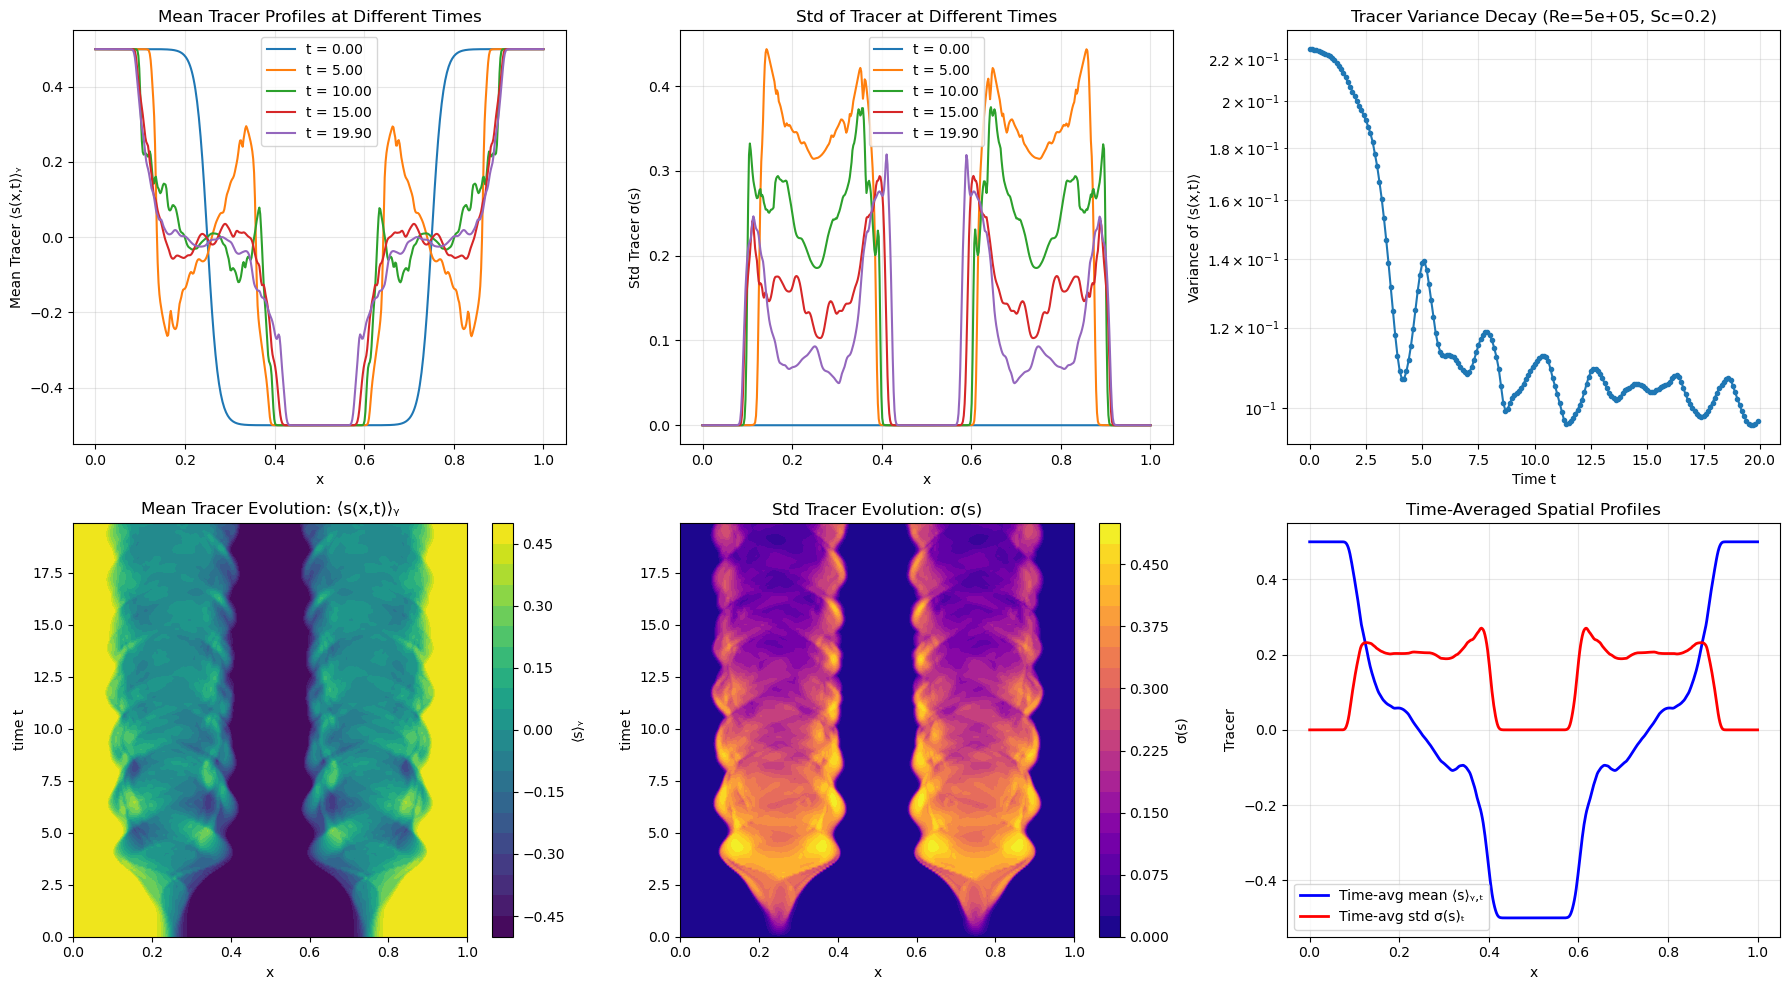


✓ Tracer visualizations complete


In [21]:
# Extract tracer data
time = data['time']
x = data['x']
tracer_mean = data['tracer_mean']
tracer_std = data['tracer_std']

# Create figure with tracer visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Select time indices for 1D plots (start, 1/4, 1/2, 3/4, end)
n_time = len(time)
time_indices = [0, n_time//4, n_time//2, 3*n_time//4, n_time-1]

# Plot 1: Mean tracer at different time snapshots
ax = axes[0, 0]
for t_idx in time_indices:
    ax.plot(x, tracer_mean[t_idx, :], label=f't = {time[t_idx]:.2f}')
ax.set_xlabel('x')
ax.set_ylabel('Mean Tracer ⟨s(x,t)⟩ᵧ')
ax.set_title('Mean Tracer Profiles at Different Times')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Std tracer at different time snapshots
ax = axes[0, 1]
for t_idx in time_indices:
    ax.plot(x, tracer_std[t_idx, :], label=f't = {time[t_idx]:.2f}')
ax.set_xlabel('x')
ax.set_ylabel('Std Tracer σ(s)')
ax.set_title('Std of Tracer at Different Times')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Variance decay over time
ax = axes[0, 2]
variance_over_time = np.var(tracer_mean, axis=1)
ax.semilogy(time, variance_over_time, 'o-', markersize=3)
ax.set_xlabel('Time t')
ax.set_ylabel('Variance of ⟨s(x,t)⟩')
ax.set_title(f'Tracer Variance Decay (Re={Re:.0e}, Sc={Sc:.1f})')
ax.grid(True, alpha=0.3, which='both')

# Plot 4: Heatmap of mean tracer evolution  
ax = axes[1, 0]
im = ax.contourf(x, time, tracer_mean, levels=20, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('time t')
ax.set_title('Mean Tracer Evolution: ⟨s(x,t)⟩ᵧ')
plt.colorbar(im, ax=ax, label='⟨s⟩ᵧ')

# Plot 5: Heatmap of std tracer evolution
ax = axes[1, 1]
im = ax.contourf(x, time, tracer_std, levels=20, cmap='plasma')
ax.set_xlabel('x')
ax.set_ylabel('time t')
ax.set_title('Std Tracer Evolution: σ(s)')
plt.colorbar(im, ax=ax, label='σ(s)')

# Plot 6: Time-averaged spatial profiles
ax = axes[1, 2]
mean_spatial = np.mean(tracer_mean, axis=0)
std_spatial = np.mean(tracer_std, axis=0)
ax.plot(x, mean_spatial, 'b-', linewidth=2, label='Time-avg mean ⟨s⟩ᵧ,ₜ')
ax.plot(x, std_spatial, 'r-', linewidth=2, label='Time-avg std σ(s)ₜ')
ax.set_xlabel('x')
ax.set_ylabel('Tracer')
ax.set_title('Time-Averaged Spatial Profiles')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Tracer visualizations complete")

## Visualize Velocity Profiles

These plots show the velocity field components (u, v) and magnitude evolution.

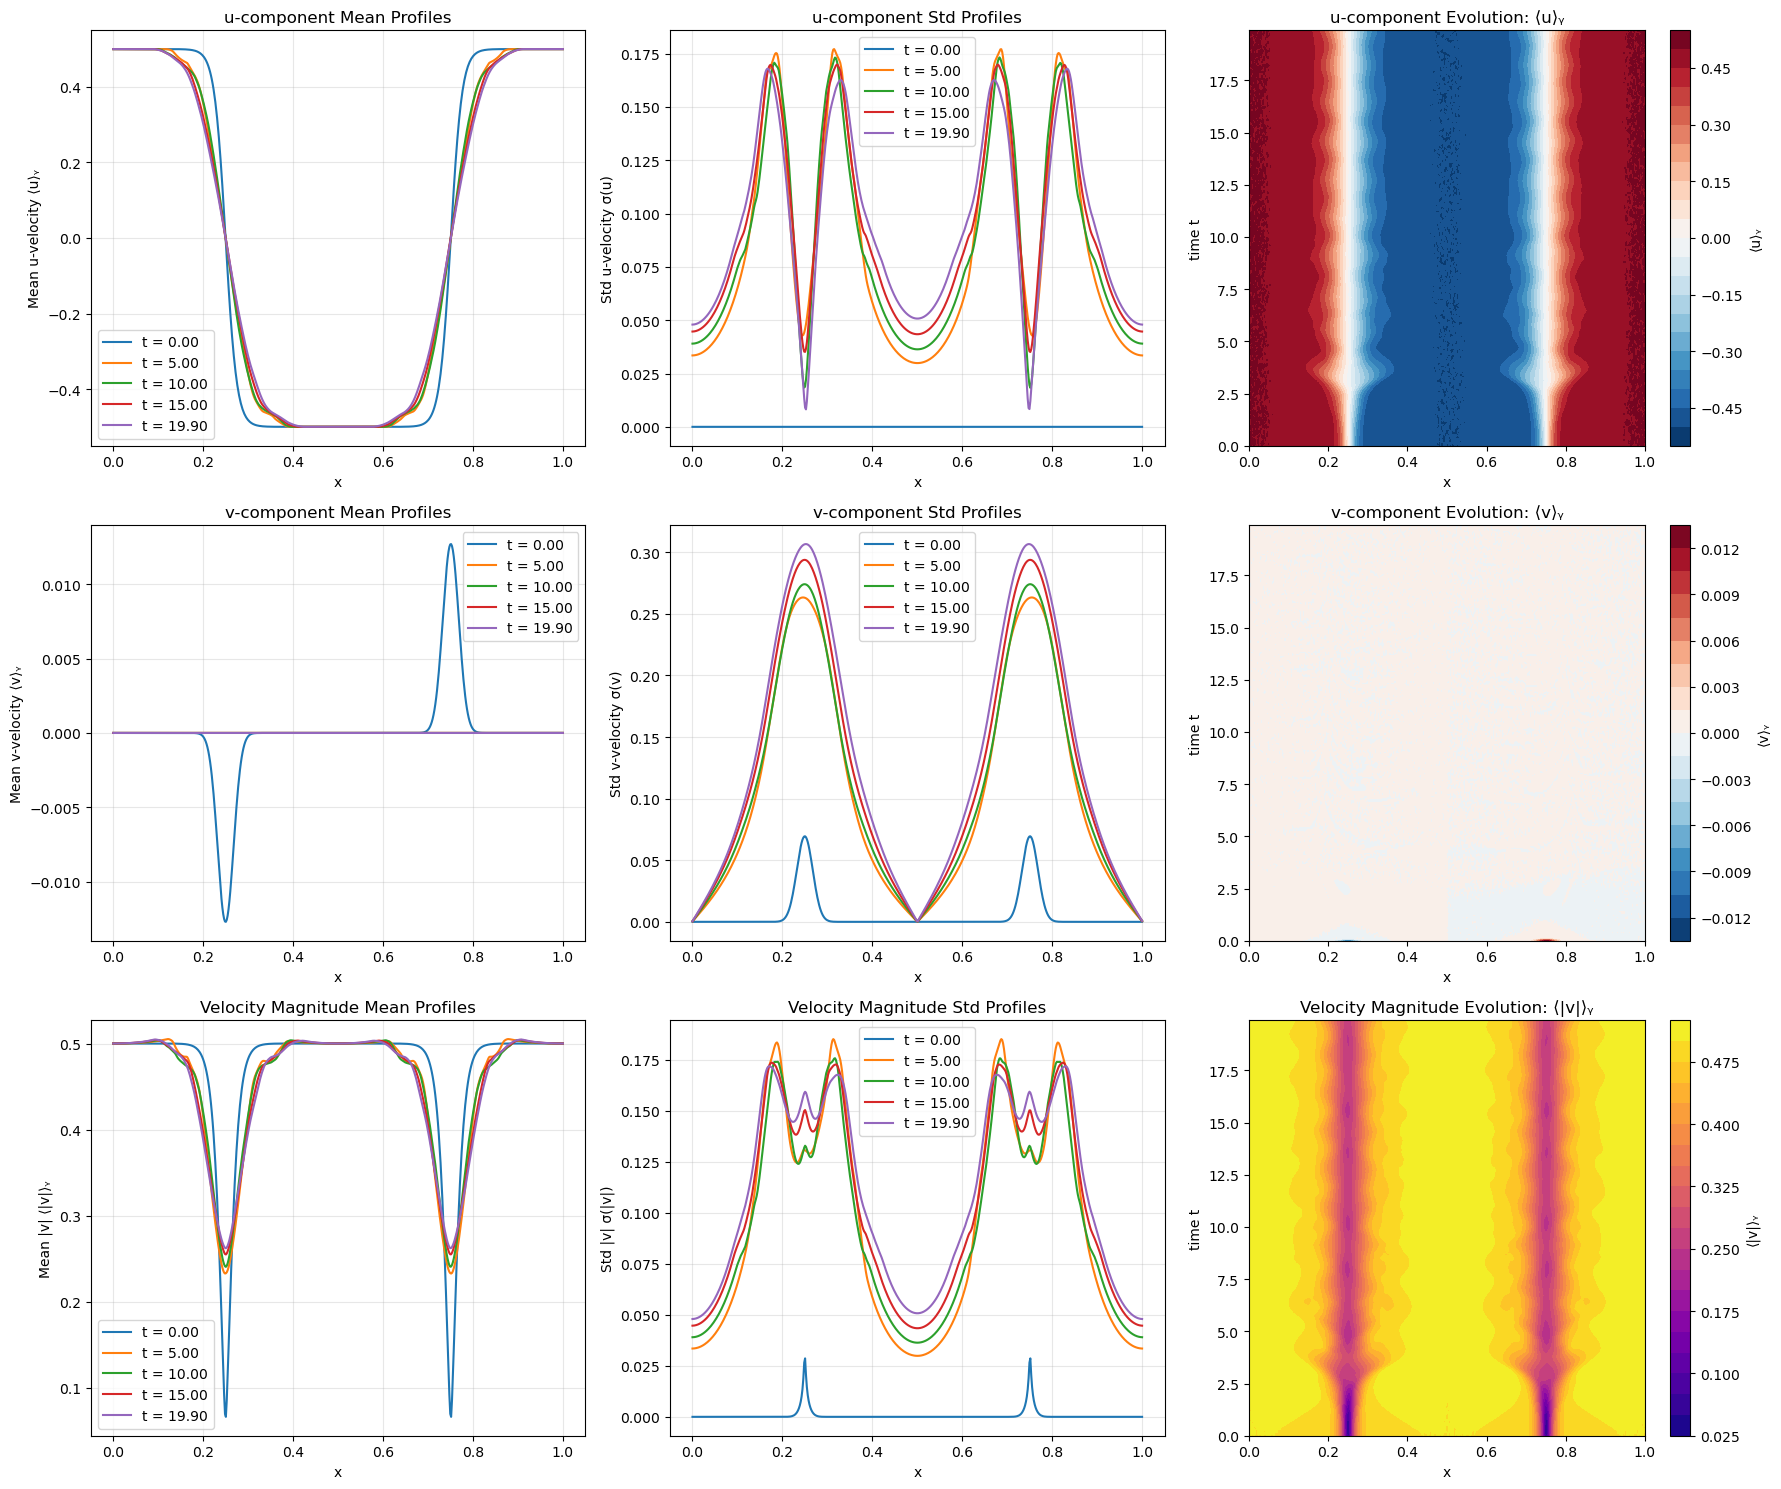


✓ Velocity visualizations complete


In [22]:
# Check if velocity data is available
if 'velocity_x_mean' in data:
    # Extract velocity data
    velocity_x_mean = data['velocity_x_mean']
    velocity_x_std = data['velocity_x_std']
    velocity_y_mean = data['velocity_y_mean']
    velocity_y_std = data['velocity_y_std']
    velocity_mag_mean = data['velocity_mag_mean']
    velocity_mag_std = data['velocity_mag_std']
    
    # Create comprehensive velocity visualization
    fig, axes = plt.subplots(3, 3, figsize=(18, 15))
    
    # Row 1: u-component (velocity in x-direction)
    # Plot 1: Mean u at different times
    ax = axes[0, 0]
    for t_idx in time_indices:
        ax.plot(x, velocity_x_mean[t_idx, :], label=f't = {time[t_idx]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('Mean u-velocity ⟨u⟩ᵧ')
    ax.set_title('u-component Mean Profiles')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 2: Std u at different times
    ax = axes[0, 1]
    for t_idx in time_indices:
        ax.plot(x, velocity_x_std[t_idx, :], label=f't = {time[t_idx]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('Std u-velocity σ(u)')
    ax.set_title('u-component Std Profiles')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 3: Heatmap of mean u evolution
    ax = axes[0, 2]
    im = ax.contourf(x, time, velocity_x_mean, levels=20, cmap='RdBu_r')
    ax.set_xlabel('x')
    ax.set_ylabel('time t')
    ax.set_title('u-component Evolution: ⟨u⟩ᵧ')
    plt.colorbar(im, ax=ax, label='⟨u⟩ᵧ')
    
    # Row 2: v-component (velocity in y-direction)
    # Plot 4: Mean v at different times
    ax = axes[1, 0]
    for t_idx in time_indices:
        ax.plot(x, velocity_y_mean[t_idx, :], label=f't = {time[t_idx]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('Mean v-velocity ⟨v⟩ᵧ')
    ax.set_title('v-component Mean Profiles')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 5: Std v at different times
    ax = axes[1, 1]
    for t_idx in time_indices:
        ax.plot(x, velocity_y_std[t_idx, :], label=f't = {time[t_idx]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('Std v-velocity σ(v)')
    ax.set_title('v-component Std Profiles')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 6: Heatmap of mean v evolution
    ax = axes[1, 2]
    im = ax.contourf(x, time, velocity_y_mean, levels=20, cmap='RdBu_r')
    ax.set_xlabel('x')
    ax.set_ylabel('time t')
    ax.set_title('v-component Evolution: ⟨v⟩ᵧ')
    plt.colorbar(im, ax=ax, label='⟨v⟩ᵧ')
    
    # Row 3: Velocity magnitude
    # Plot 7: Mean |v| at different times
    ax = axes[2, 0]
    for t_idx in time_indices:
        ax.plot(x, velocity_mag_mean[t_idx, :], label=f't = {time[t_idx]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('Mean |v| ⟨|v|⟩ᵧ')
    ax.set_title('Velocity Magnitude Mean Profiles')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 8: Std |v| at different times
    ax = axes[2, 1]
    for t_idx in time_indices:
        ax.plot(x, velocity_mag_std[t_idx, :], label=f't = {time[t_idx]:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel('Std |v| σ(|v|)')
    ax.set_title('Velocity Magnitude Std Profiles')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 9: Heatmap of mean |v| evolution
    ax = axes[2, 2]
    im = ax.contourf(x, time, velocity_mag_mean, levels=20, cmap='plasma')
    ax.set_xlabel('x')
    ax.set_ylabel('time t')
    ax.set_title('Velocity Magnitude Evolution: ⟨|v|⟩ᵧ')
    plt.colorbar(im, ax=ax, label='⟨|v|⟩ᵧ')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Velocity visualizations complete")
    
else:
    print("❌ Velocity data not found in this file")
    print("The file may only contain tracer data.")

## Combined Analysis: Tracer and Velocity

Compare tracer transport with velocity field characteristics.

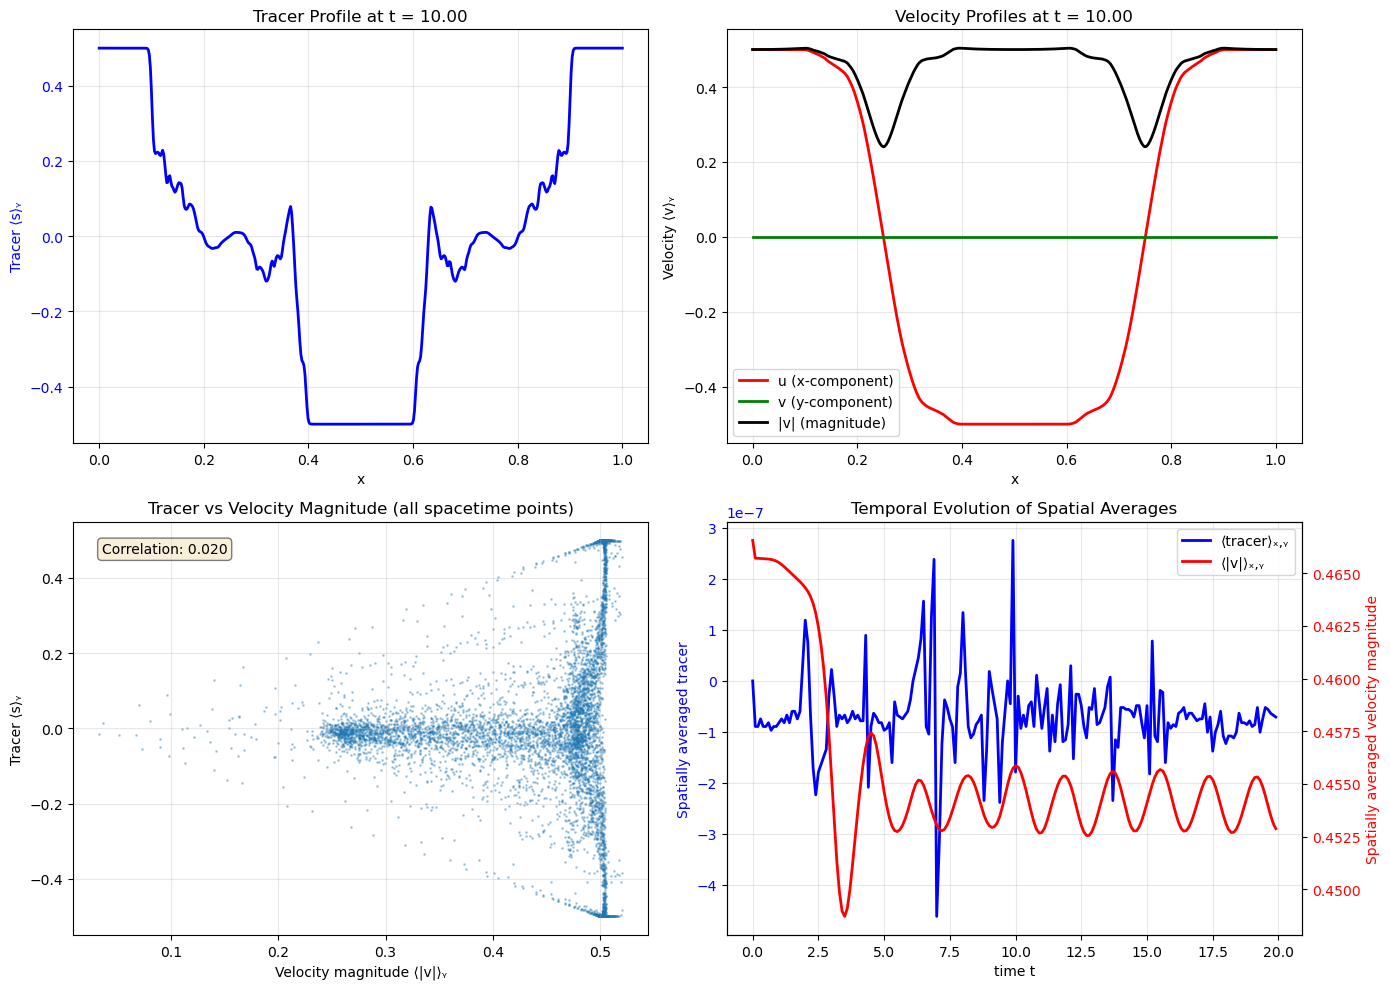


✓ Combined analysis complete

Key statistics:
  Tracer-velocity correlation: 0.0201
  Mean tracer decay: 0.0000 → -0.0000
  Mean velocity variation: 0.4487 to 0.4666


In [23]:
if 'velocity_x_mean' in data:
    # Create a combined visualization at a specific time
    t_idx = n_time // 2  # Middle of simulation
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Tracer mean profile at t_mid
    ax = axes[0, 0]
    ax.plot(x, tracer_mean[t_idx, :], 'b-', linewidth=2)
    ax.set_xlabel('x')
    ax.set_ylabel('Tracer ⟨s⟩ᵧ', color='b')
    ax.set_title(f'Tracer Profile at t = {time[t_idx]:.2f}')
    ax.tick_params(axis='y', labelcolor='b')
    ax.grid(True, alpha=0.3)
    
    # Plot 2: Velocity components at t_mid
    ax = axes[0, 1]
    ax.plot(x, velocity_x_mean[t_idx, :], 'r-', linewidth=2, label='u (x-component)')
    ax.plot(x, velocity_y_mean[t_idx, :], 'g-', linewidth=2, label='v (y-component)')
    ax.plot(x, velocity_mag_mean[t_idx, :], 'k-', linewidth=2, label='|v| (magnitude)')
    ax.set_xlabel('x')
    ax.set_ylabel('Velocity ⟨v⟩ᵧ')
    ax.set_title(f'Velocity Profiles at t = {time[t_idx]:.2f}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Plot 3: Correlation between tracer and velocity magnitude
    ax = axes[1, 0]
    # Flatten arrays for scatter plot
    tracer_flat = tracer_mean.flatten()
    vel_mag_flat = velocity_mag_mean.flatten()
    ax.scatter(vel_mag_flat[::10], tracer_flat[::10], alpha=0.3, s=1)
    ax.set_xlabel('Velocity magnitude ⟨|v|⟩ᵧ')
    ax.set_ylabel('Tracer ⟨s⟩ᵧ')
    ax.set_title('Tracer vs Velocity Magnitude (all spacetime points)')
    ax.grid(True, alpha=0.3)
    
    # Compute correlation coefficient
    corr = np.corrcoef(tracer_flat, vel_mag_flat)[0, 1]
    ax.text(0.05, 0.95, f'Correlation: {corr:.3f}', 
            transform=ax.transAxes, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # Plot 4: Time evolution of spatial averages
    ax = axes[1, 1]
    tracer_spatial_avg = np.mean(tracer_mean, axis=1)
    vel_mag_spatial_avg = np.mean(velocity_mag_mean, axis=1)
    
    ax2 = ax.twinx()
    line1 = ax.plot(time, tracer_spatial_avg, 'b-', linewidth=2, label='⟨tracer⟩ₓ,ᵧ')
    line2 = ax2.plot(time, vel_mag_spatial_avg, 'r-', linewidth=2, label='⟨|v|⟩ₓ,ᵧ')
    
    ax.set_xlabel('time t')
    ax.set_ylabel('Spatially averaged tracer', color='b')
    ax2.set_ylabel('Spatially averaged velocity magnitude', color='r')
    ax.tick_params(axis='y', labelcolor='b')
    ax2.tick_params(axis='y', labelcolor='r')
    ax.set_title('Temporal Evolution of Spatial Averages')
    ax.grid(True, alpha=0.3)
    
    # Combine legends
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax.legend(lines, labels, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n✓ Combined analysis complete")
    print(f"\nKey statistics:")
    print(f"  Tracer-velocity correlation: {corr:.4f}")
    print(f"  Mean tracer decay: {tracer_spatial_avg[0]:.4f} → {tracer_spatial_avg[-1]:.4f}")
    print(f"  Mean velocity variation: {vel_mag_spatial_avg.min():.4f} to {vel_mag_spatial_avg.max():.4f}")
    
else:
    print("Skipping combined analysis - velocity data not available")

## How to Analyze Different Cases

To analyze a different Reynolds number, Schmidt number, or initial condition:

1. **Modify the parameters** in the second cell:
   - Change `Re` to one of: `1e4`, `5e4`, `1e5`, `5e5`
   - Change `Sc` to one of: `0.1`, `0.2`, `0.5`, `1.0`, `2.0`, `5.0`, `10.0`
   - Change `ic_index` to any value from `0` to `39`

2. **Run all cells** (Cell → Run All from the menu)

3. The notebook will automatically:
   - **Check for the `.npz` file locally** in the current directory
   - **If not found, download it from GitHub** (if available in the repository)
   - Load the data and generate all visualizations
   - Display statistics and correlations

**Example**: To compare different Reynolds numbers:
- Run this notebook with `Re = 1e4`, save/screenshot results
- Change to `Re = 1e5`, run again
- Compare how the flow dynamics change with Reynolds number

**Data Sources**:
- The notebook automatically downloads data files from the GitHub repository if not found locally
- If the file doesn't exist in the repo either, you'll need to run `shearflow_preprocessing.ipynb` first to generate it
- Once downloaded, files are cached locally for faster subsequent runs